<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/3_Keras_Misclassification_and_Model_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('mnist_simple_cnn_25_Epochs.h5')

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

x_test = x_test.reshape(10000, 28, 28, 1)
print(x_test.shape)

print('Predicting classes for all 10000 images...')
pred = np.argmax(model.predict(x_test), axis=1)
print('Completed\n')

(10000, 28, 28, 1)
Predicting classes for all 10000 images...
313/313 [==============================] - 9s 28ms/step
Completed



In [ ]:
import cv2
import numpy as np

result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)

print(f'Indices of misclassified data are: \n{misclassified_indices}')
print(len(misclassified_indices[0]))

Indices of misclassified data are: 
(array([   8,   33,  124,  149,  195,  233,  241,  247,  259,  300,  313,
        318,  320,  321,  340,  352,  358,  444,  445,  448,  478,  479,
        483,  502,  511,  531,  543,  565,  578,  591,  610,  613,  628,
        629,  658,  659,  684,  689,  691,  707,  717,  720,  740,  791,
        839,  844,  866,  898,  924,  947,  950,  956,  959,  965,  975,
        999, 1003, 1014, 1032, 1039, 1044, 1062, 1073, 1082, 1101, 1107,
       1112, 1114, 1128, 1173, 1181, 1182, 1191, 1192, 1194, 1198, 1204,
       1206, 1226, 1232, 1234, 1242, 1247, 1260, 1283, 1289, 1299, 1319,
       1326, 1328, 1337, 1378, 1393, 1410, 1433, 1440, 1444, 1453, 1466,
       1467, 1494, 1500, 1522, 1527, 1530, 1549, 1553, 1569, 1581, 1609,
       1634, 1640, 1671, 1681, 1709, 1717, 1718, 1737, 1754, 1790, 1813,
       1828, 1850, 1857, 1865, 1868, 1878, 1883, 1901, 1917, 1930, 1938,
       1940, 1952, 1970, 1973, 1981, 1982, 1984, 2001, 2016, 2024, 2035,
       2043, 2

**Visualizing the Images our models misclassified**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define imshow function
def imgshow(title = "", image = None, size = 6):
  if image.any():
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize = (size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
  else:
    print('Image not found')


1/1 [==============================] - 0s 23ms/step


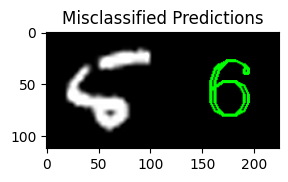

1/1 [==============================] - 0s 23ms/step


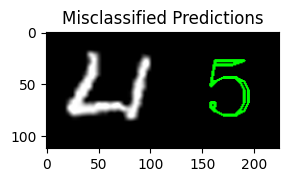

1/1 [==============================] - 0s 25ms/step


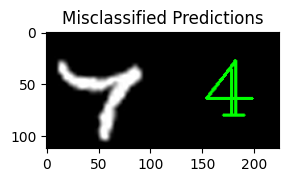

1/1 [==============================] - 0s 26ms/step


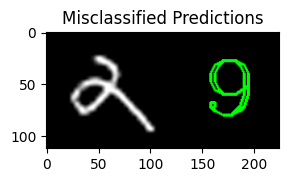

1/1 [==============================] - 0s 23ms/step


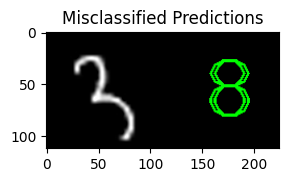

1/1 [==============================] - 0s 23ms/step


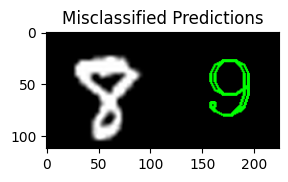

1/1 [==============================] - 0s 23ms/step


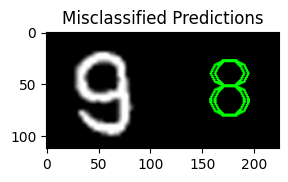

1/1 [==============================] - 0s 23ms/step


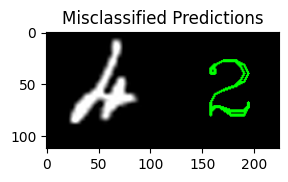

1/1 [==============================] - 0s 23ms/step


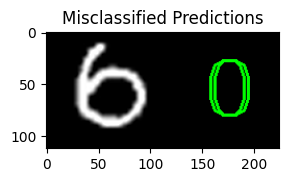

1/1 [==============================] - 0s 27ms/step


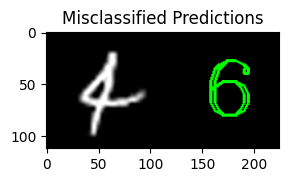

In [ ]:
import cv2
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

def draw_test(name, pred, input_im):
  BLACK = [0,0,0]
  expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value = BLACK)
  expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
  cv2.putText(expanded_image, str(pred), (150, 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
  imgshow(name, expanded_image)

for i in range(0, 10):
  input_im = x_test[misclassified_indices[0][i]]

  imageL = cv2.resize(input_im, None, fx = 4, fy = 4, interpolation = cv2.INTER_CUBIC)
  input_im = input_im.reshape(1, 28, 28, 1)

  res = str(np.argmax(model.predict(input_im), axis=-1)[0])
  draw_test('Misclassified Predictions', res, np.uint8(imageL))

**A more elegant way to plot it**

1/1 [==============================] - 0s 40ms/step


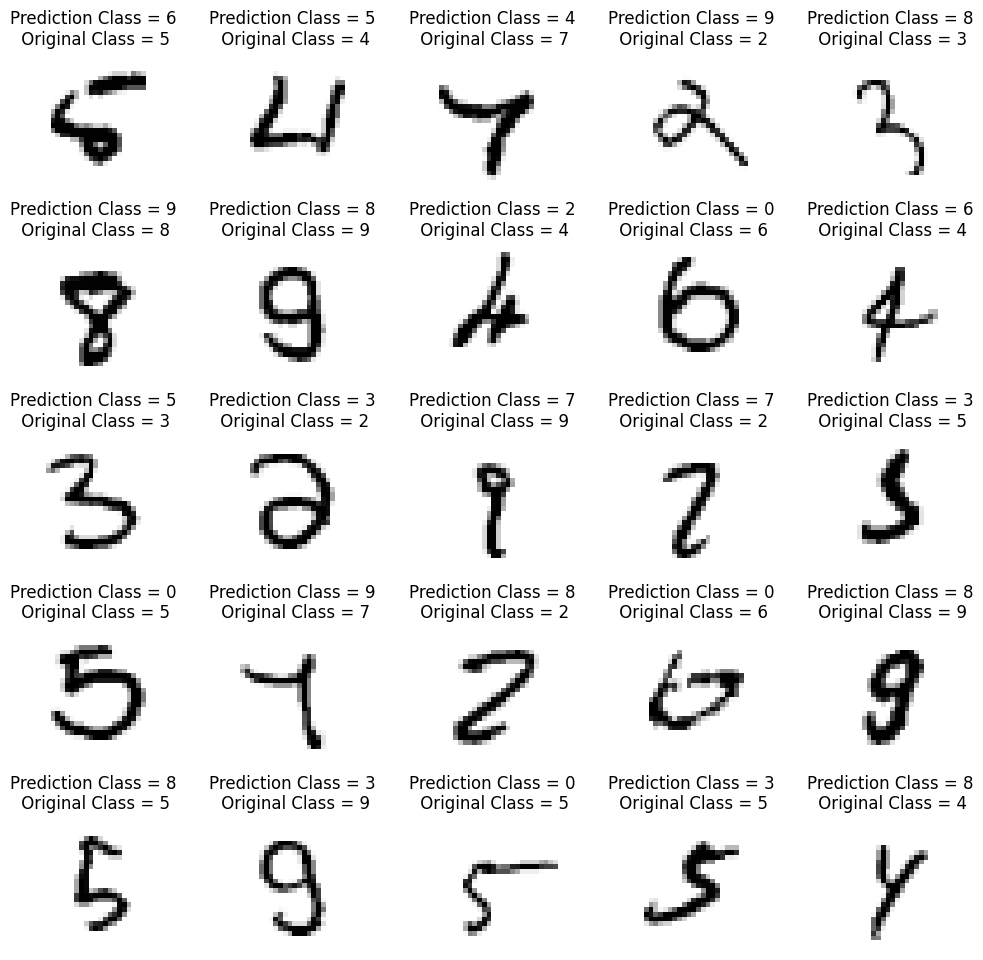

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  input_im = x_test[misclassified_indices[0][i]]
  ind = misclassified_indices[0][i]
  predicted_class = str(np.argmax(model.predict(input_im.reshape(1, 28, 28, 1)), axis=-1)[0])
  axes[i].imshow(input_im.reshape(28, 28), cmap='gray_r')
  axes[i].set_title(f'Prediction Class = {predicted_class}\n Original Class = {y_test[ind]}')
  axes[i].axis('off')

plt.subplots_adjust(wspace = 0.5)

**Creating Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

x_test = x_test.reshape(10000, 28, 28, 1)
y_pred = np.argmax(model.predict(x_test), axis=-1)

print(confusion_matrix(y_test, y_pred))

313/313 [==============================] - 9s 30ms/step
[[ 967    0    1    2    0    3    3    2    2    0]
 [   0 1114    4    3    0    1    4    2    7    0]
 [   7    1  966   15    7    1    8    7   17    3]
 [   4    1   13  958    1    2    1    9   14    7]
 [   1    0    7    0  930    1    6    3    5   29]
 [  10    1    3   34    5  789   16    3   24    7]
 [  11    4    4    1    5    9  918    3    3    0]
 [   2    7   21    9    6    0    0  956    3   24]
 [   6    3    3   17    7    9    8    5  908    8]
 [  10    6    2   12   24    0    0   10    9  936]]


**Per class accuracy**

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i, ca) in enumerate(class_accuracy):
  print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 98.673%
Accuracy for 1 : 98.150%
Accuracy for 2 : 93.605%
Accuracy for 3 : 94.851%
Accuracy for 4 : 94.705%
Accuracy for 5 : 88.453%
Accuracy for 6 : 95.825%
Accuracy for 7 : 92.996%
Accuracy for 8 : 93.224%
Accuracy for 9 : 92.765%


**Classification report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.91      0.95      0.93      1010
           4       0.94      0.95      0.95       982
           5       0.97      0.88      0.92       892
           6       0.95      0.96      0.96       958
           7       0.96      0.93      0.94      1028
           8       0.92      0.93      0.92       974
           9       0.92      0.93      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

